# Create a Basic Neural Network for Image Classification

## 1. Import Library and Data

In [ ]:
#@title Code for loading the data
# import libraries 
import tensorflow as tf 
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

# utilities library
import cv2
import os

# !rm -rf jaffe
# !rm -rf __MACOSX
# !rm jaffe.zip
!wget https://github.com/iqbalbasyar/kickstart_gan/raw/main/jaffe.zip -q
!unzip -q jaffe.zip 


data_path = 'jaffe'
data_dir_list = os.listdir(data_path)

img_data_list=[]
img_label = []
label_map = {}
i = 0 

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    label_map[i] = str(dataset)
    
    for img in img_list:
        img_label.append(i)
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)
    i += 1

img_data = np.array(img_data_list)
img_data = img_data.astype('float')
img_data = img_data/255 #normalization
img_label = np.array(img_label)

def getlabel(id):
    return label_map[id]

**About this Data**: 

We will use the Japanese Female Facial Expression (JAFFE) dataset which has 183 images of 10 different female models posing for 6 emotions. The data will be normalized so its value will ranging from 0 to 1. 

The label will be denoted as numbers, which follow this mapping : 

|    | Expression   |
|---:|:-------------|
|  0 | HAPPY         |
|  1 | SURPRISE          |
|  2 | FEAR        |
|  3 | SAD     |
|  4 | ANGRY        |
|  5 | DISGUST      |

<details> <summary>Cite the author</summary>
Michael J. Lyons, Shigeru Akamatsu, Miyuki Kamachi, Jiro Gyoba. Coding Facial Expressions with Gabor Wavelets, 3rd IEEE International Conference on Automatic Face and Gesture Recognition, pp. 200-205 (1998). http://doi.org/10.1109/AFGR.1998.670949 Open access content available at: https://zenodo.org/record/3430156

</details>

In [4]:
# show the dimension of data and the label
img_data.shape, img_label.shape

((183, 128, 128, 3), (183,))

To help you more understand about the data shape, here's an illustration of colored image represented as 3d array. 

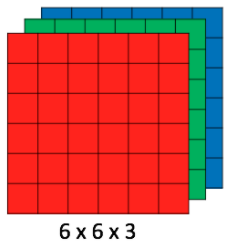

You can also visualize a few sample of the data to take a better understanding 

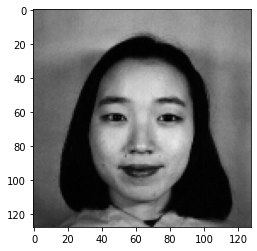

In [5]:
i = 0
plt.imshow(img_data[i])

In [6]:
print(f"label of the #{i} image is : {img_label[i]}")
print(f"which is translated into : {getlabel(img_label[i])}")

label of the #0 image is : 0
which is translated into : HAPPY


## Data Split (Train Test Split)

In previous notebook, we tested the model with a number that did not exist in the training data, and see if it can predict correctly. This process of comparing the model performance on training data vs the performance of unseen (test) data is called **Cross Validation**.

Because we cannot easily generate new image and test it into the model, we are going to take several image from train data and use it as test data. 

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(img_data, img_label, test_size=0.1, random_state=0)

In [8]:
print(f"The size of training sample : {x_train.shape}")
print(f"The size of test sample : {x_test.shape}")

The size of training sample : (164, 128, 128, 3)
The size of test sample : (19, 128, 128, 3)


___